### Tasks/Activities List
Your code should contain the following activities and analyses:

- Collect the data from the zip file linked here.
- Split the dataset into dependent and independent variables.
- Perform train, test split.
- Apply StandardScaler() to the train and test dependent variable.
- Fit the best parameters.
- Model Prediction
- Model Validation Statistics
- Create a FastAPI app
- Create routes for getting predictions
- Create a route for retraining the mode

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cus_df= pd.read_excel(r"C:\Users\kaund\Python_class\Pract\UpKh_Python-main\Session Projects\Teleco churn prediction\telco_new.xlsx")

In [3]:
#data preview 
pd.set_option('display.max_columns', None)
cus_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,2,No,No,Yes,No,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00,No,No,No,No,No,No,Yes,No,No,1.308333,#NULL!,#NULL!,2.014903,#NULL!,4.158883,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,6,Yes,No,Yes,Yes,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,1.481605,3.032546,#NULL!,2.72458,3.575151,4.912655,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,2,Yes,No,Yes,No,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00,No,No,No,No,Yes,Yes,No,Yes,No,2.898671,2.890372,#NULL!,3.409496,#NULL!,4.753590,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,1,No,No,No,No,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00,No,No,No,No,No,No,No,No,No,2.246015,#NULL!,#NULL!,#NULL!,#NULL!,3.496508,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,4,No,No,No,No,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00,No,No,No,No,Yes,No,Yes,Yes,No,1.840550,#NULL!,#NULL!,#NULL!,#NULL!,3.401197,Plus service,No


In [4]:
#checking shape of the data 
cus_df.shape

(1000, 42)

In [5]:
cus_df.columns.values

array(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'longten', 'tollten', 'equipten', 'cardten',
       'wireten', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'ebill', 'loglong', 'logtoll',
       'logequi', 'logcard', 'logwire', 'lninc', 'custcat', 'churn'],
      dtype=object)

In [6]:
#checking data type of variables 
cus_df.dtypes

region       object
tenure        int64
age           int64
marital      object
address       int64
income        int64
ed           object
employ        int64
retire       object
gender       object
reside        int64
tollfree     object
equip        object
callcard     object
wireless     object
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
equipten    float64
cardten     float64
wireten     float64
multline     object
voice        object
pager        object
internet     object
callid       object
callwait     object
forward      object
confer       object
ebill        object
loglong     float64
logtoll      object
logequi      object
logcard      object
logwire      object
lninc       float64
custcat      object
churn        object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variab
cus_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1000.0,35.526000,21.359812,1.000000,17.000000,34.000000,54.000000,72.000000
age,1000.0,41.684000,12.558816,18.000000,32.000000,40.000000,51.000000,77.000000
address,1000.0,11.551000,10.086681,0.000000,3.000000,9.000000,18.000000,55.000000
income,1000.0,77.535000,107.044165,9.000000,29.000000,47.000000,83.000000,1668.000000
employ,1000.0,10.987000,10.082087,0.000000,3.000000,8.000000,17.000000,47.000000
reside,1000.0,2.331000,1.435793,1.000000,1.000000,2.000000,3.000000,8.000000
longmon,1000.0,11.723100,10.363486,0.900000,5.200000,8.525000,14.412500,99.950000
tollmon,1000.0,13.274000,16.902122,0.000000,0.000000,0.000000,24.250000,173.000000
equipmon,1000.0,14.219800,19.068539,0.000000,0.000000,0.000000,31.475000,77.700000
cardmon,1000.0,13.781000,14.084496,0.000000,0.000000,12.000000,20.500000,109.250000


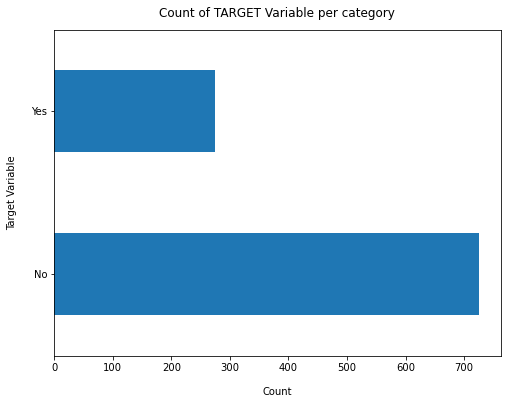

In [8]:
cus_df['churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*cus_df['churn'].value_counts()/len(cus_df['churn'])

No     72.6
Yes    27.4
Name: churn, dtype: float64

In [10]:
cus_df['churn'].value_counts()

No     726
Yes    274
Name: churn, dtype: int64

- Our target variable is highly imbalanced, ratio = 72:27

In [11]:
# Concise Summary of the dataframe, as we have too many columns
cus_df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   object 
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   object 
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   object 
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   object 
 9   gender    1000 non-null   object 
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   object 
 12  equip     1000 non-null   object 
 13  callcard  1000 non-null   object 
 14  wireless  1000 non-null   object 
 15  longmon   1000 non-null   float64
 16  tollmon   1000 non-null   float64
 17  equipmon  1000 non-null   float64
 18  cardmon   1000 non-null   float64
 19  wiremon   1000 non-null   float64
 20  longten   1000 non-null   float

C:\Users\kaund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


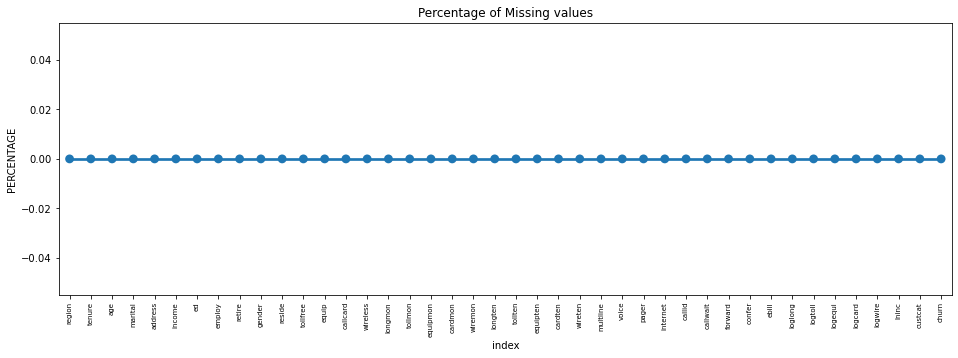

In [12]:
#checking for missing values 
missing = pd.DataFrame((cus_df.isnull().sum())*100/cus_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Data Cleaning and preprocessing 

In [13]:
#creating a copy of the data for manupulation and processing 
data = cus_df.copy()

In [14]:
#Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12,
#for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...
# Get the max tenure

print(data['tenure'].max()) #72

72


In [15]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [16]:
data['tenure_group'].value_counts()


13 - 24    190
1 - 12     181
61 - 72    167
25 - 36    154
37 - 48    154
49 - 60    154
Name: tenure_group, dtype: int64

In [17]:
print(data['age'].max())
print(data['age'].min())

77
18


In [18]:
#creating age group
bins= [18,62,80]
labels = ['Junior','Senior']
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data['AgeGroup'] .value_counts()

Junior    926
Senior     74
Name: AgeGroup, dtype: int64

In [19]:
#dropping unwanted columns
data.drop(columns=['logtoll', 'logequi', 'logcard', 'logwire','tenure','age'],inplace=True)
data.head()

,region,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn,tenure_group,AgeGroup
0,Zone 2,Married,9,64,College degree,5,No,Male,2,No,No,Yes,No,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00,No,No,No,No,No,No,Yes,No,No,1.308333,4.158883,Basic service,Yes,13 - 24,Junior
1,Zone 3,Married,7,136,Post-undergraduate degree,5,No,Male,6,Yes,No,Yes,Yes,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,1.481605,4.912655,Total service,Yes,1 - 12,Junior
2,Zone 3,Married,24,116,Did not complete high school,29,No,Female,2,Yes,No,Yes,No,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00,No,No,No,No,Yes,Yes,No,Yes,No,2.898671,4.753590,Plus service,No,61 - 72,Junior
3,Zone 2,Unmarried,12,33,High school degree,0,No,Female,1,No,No,No,No,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00,No,No,No,No,No,No,No,No,No,2.246015,3.496508,Basic service,Yes,25 - 36,Junior
4,Zone 2,Married,9,30,Did not complete high school,2,No,Male,4,No,No,No,No,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00,No,No,No,No,Yes,No,Yes,Yes,No,1.840550,3.401197,Plus service,No,13 - 24,Junior


In [20]:
data.dtypes

region            object
marital           object
address            int64
income             int64
ed                object
employ             int64
retire            object
gender            object
reside             int64
tollfree          object
equip             object
callcard          object
wireless          object
longmon          float64
tollmon          float64
equipmon         float64
cardmon          float64
wiremon          float64
longten          float64
tollten          float64
equipten         float64
cardten          float64
wireten          float64
multline          object
voice             object
pager             object
internet          object
callid            object
callwait          object
forward           object
confer            object
ebill             object
loglong          float64
lninc            float64
custcat           object
churn             object
tenure_group    category
AgeGroup        category
dtype: object

In [21]:
#subsetting   numeric columns 
num_cols=data.select_dtypes([np.number]).columns
num_cols

Index(['address', 'income', 'employ', 'reside', 'longmon', 'tollmon',
       'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'equipten',
       'cardten', 'wireten', 'loglong', 'lninc'],
      dtype='object')

### EDA 

C:\Users\kaund\AppData\Local\Temp\ipykernel_73608\3762933353.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


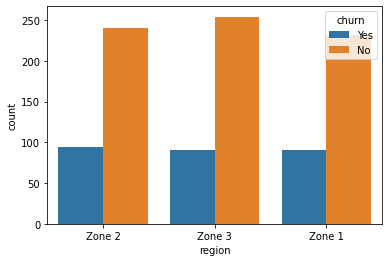

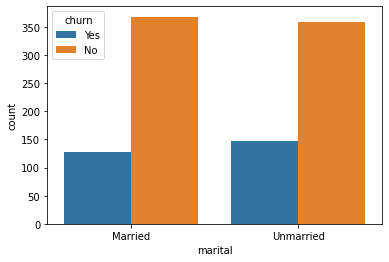

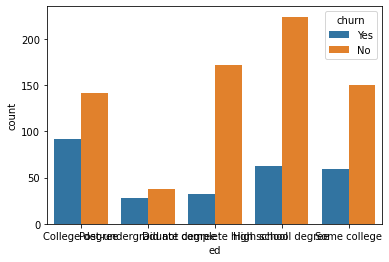

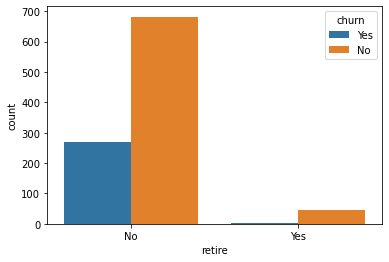

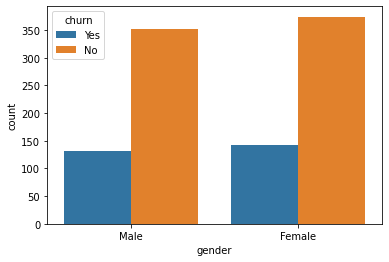

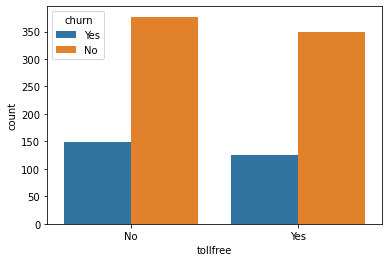

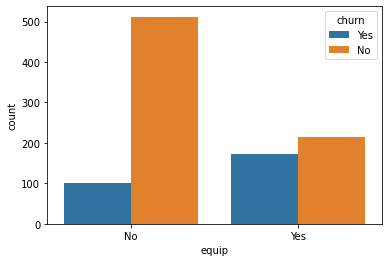

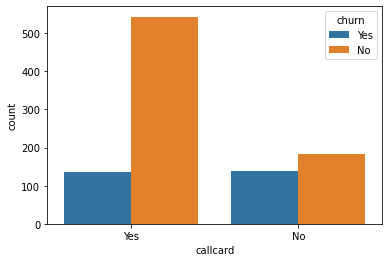

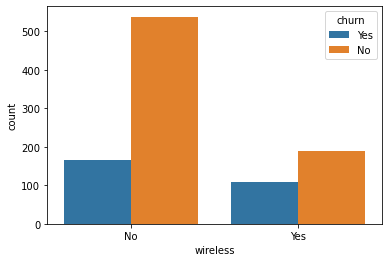

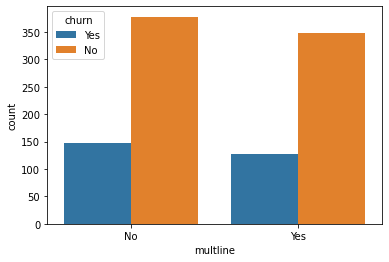

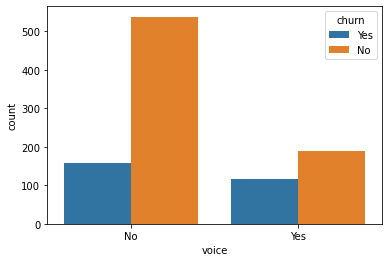

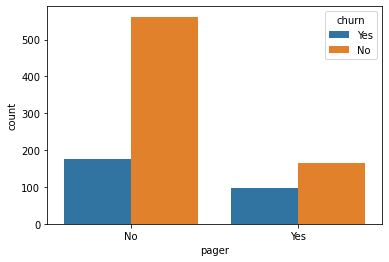

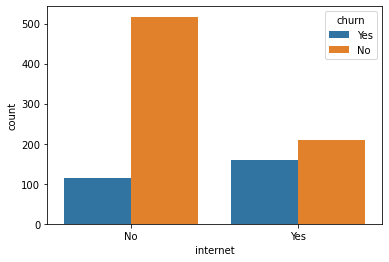

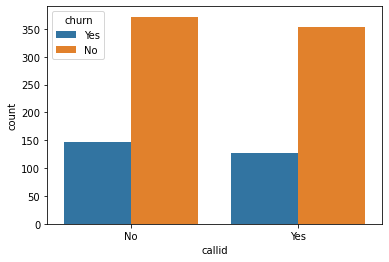

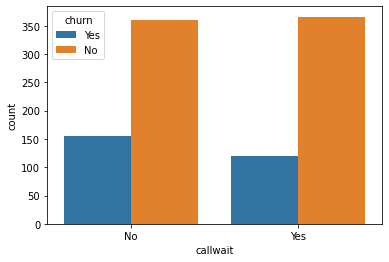

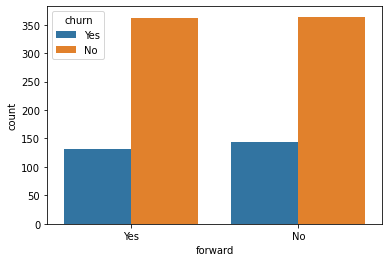

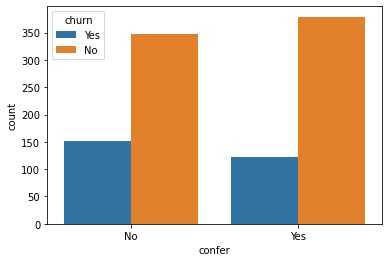

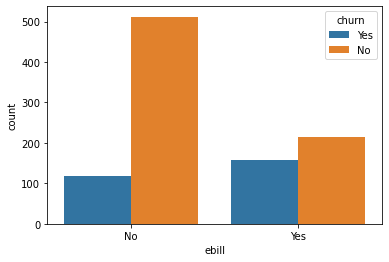

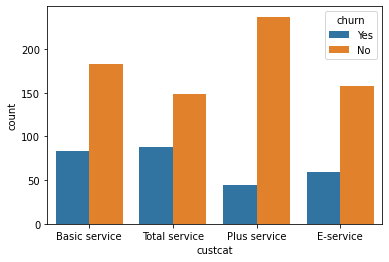

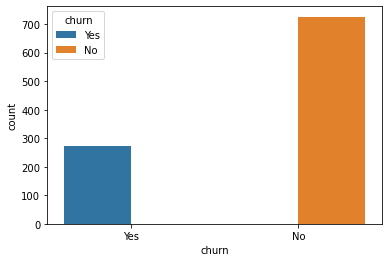

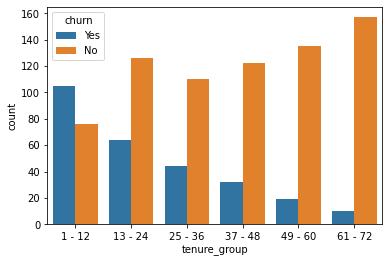

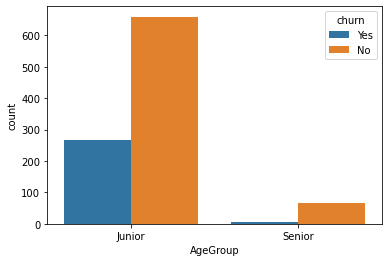

In [22]:
# Plot distibution of individual predictors by churn
for i, predictor in enumerate(data.drop(columns=num_cols)):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='churn')

In [23]:
#converting taregt churn variables 
data['churn'] = np.where(data.churn == 'Yes',1,0)

In [24]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc,churn,region_Zone 1,region_Zone 2,region_Zone 3,marital_Married,marital_Unmarried,ed_College degree,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_No,retire_Yes,gender_Female,gender_Male,tollfree_No,tollfree_Yes,equip_No,equip_Yes,callcard_No,callcard_Yes,wireless_No,wireless_Yes,multline_No,multline_Yes,voice_No,voice_Yes,pager_No,pager_Yes,internet_No,internet_Yes,callid_No,callid_Yes,callwait_No,callwait_Yes,forward_No,forward_Yes,confer_No,confer_Yes,ebill_No,ebill_Yes,custcat_Basic service,custcat_E-service,custcat_Plus service,custcat_Total service,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,AgeGroup_Junior,AgeGroup_Senior
0,9,64,5,2,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00,1.308333,4.158883,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,7,136,5,6,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35,1.481605,4.912655,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0
2,24,116,29,2,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00,2.898671,4.753590,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0
3,12,33,0,1,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00,2.246015,3.496508,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
4,9,30,2,4,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00,1.840550,3.401197,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [25]:
data_dummies.to_csv("Dummy_Customer_Churn.csv")

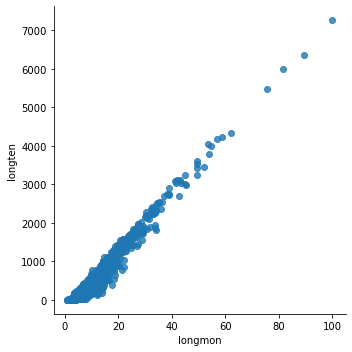

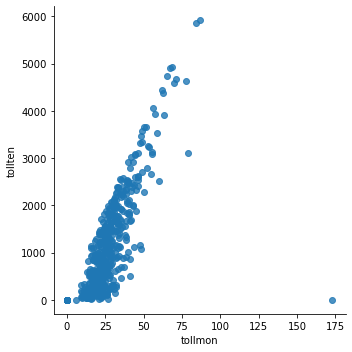

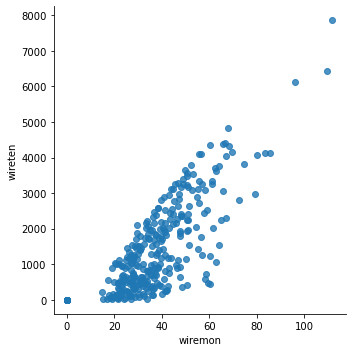

In [26]:
#Relationship between bills
sns.lmplot(data=data_dummies, x='longmon', y='longten', fit_reg=False)
sns.lmplot(data=data_dummies, x='tollmon', y='tollten', fit_reg=False)
sns.lmplot(data=data_dummies, x='wiremon', y='wireten', fit_reg=False)

- Just to  pick afew of charges,we can see that ten months  bills are increasing as monthly bills increase

<AxesSubplot:>

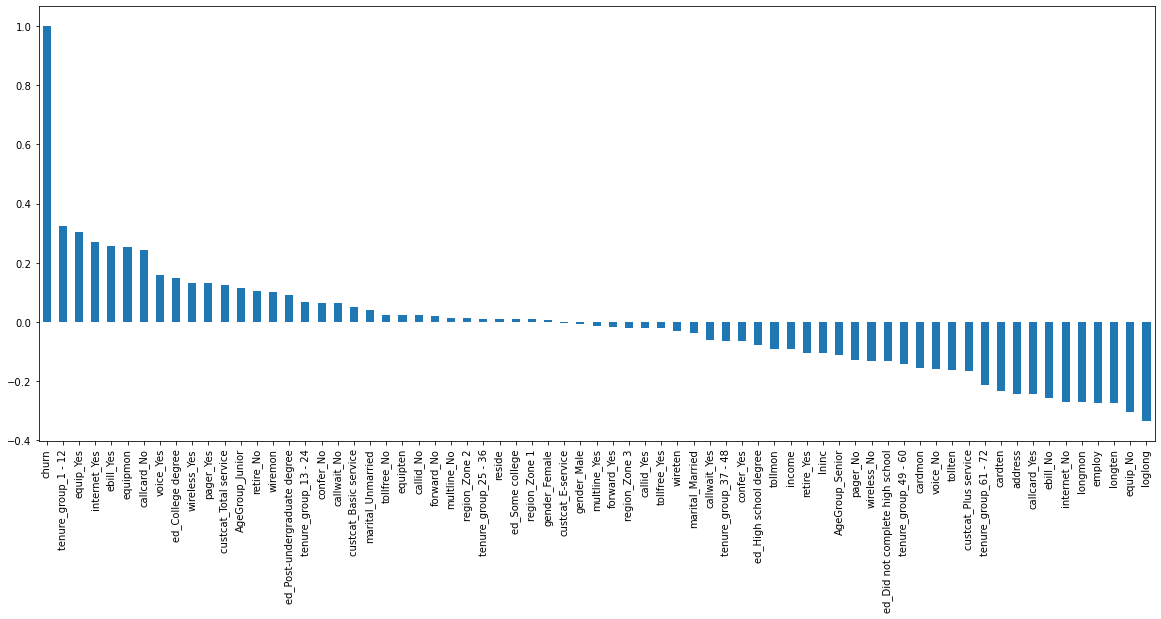

In [27]:
plt.figure(figsize=(20,8))
data_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

### Derived Insight:

- HIGH Churn seen in case of Month to month contracts, equip_yes, internet_yes, e_bill and equipmon

- LOW Churn is seens in case of Long term contracts, customer plus service and senior age group 

- Factors like customer E-service, gender and # of multiple lines have alomost NO impact on Churn

- This is also evident from the Heatmap below

<AxesSubplot:>

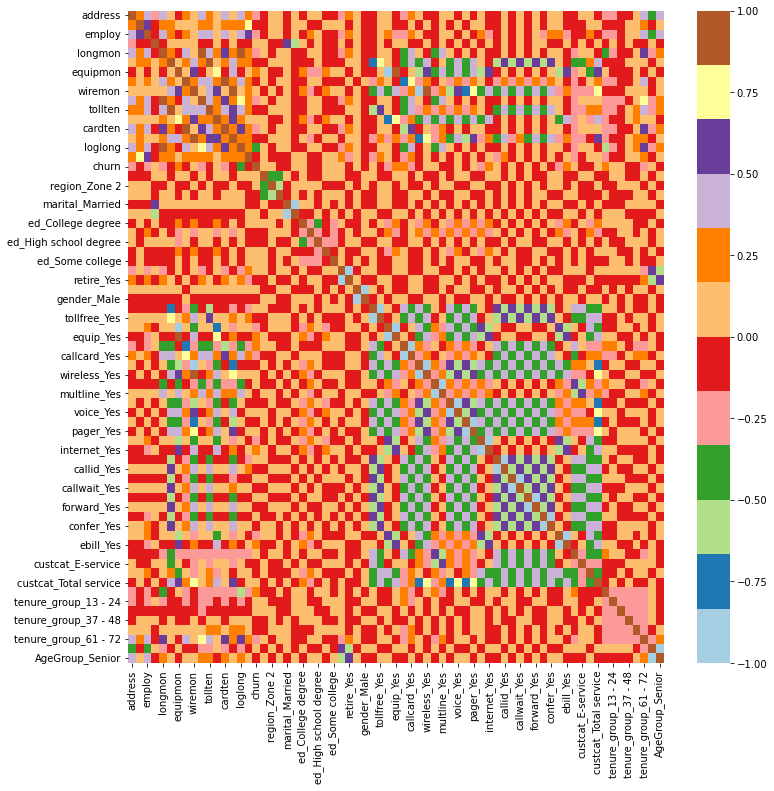

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [29]:
new_df1_target0=data.loc[data["churn"]==0]
new_df1_target1=data.loc[data["churn"]==1]

In [30]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

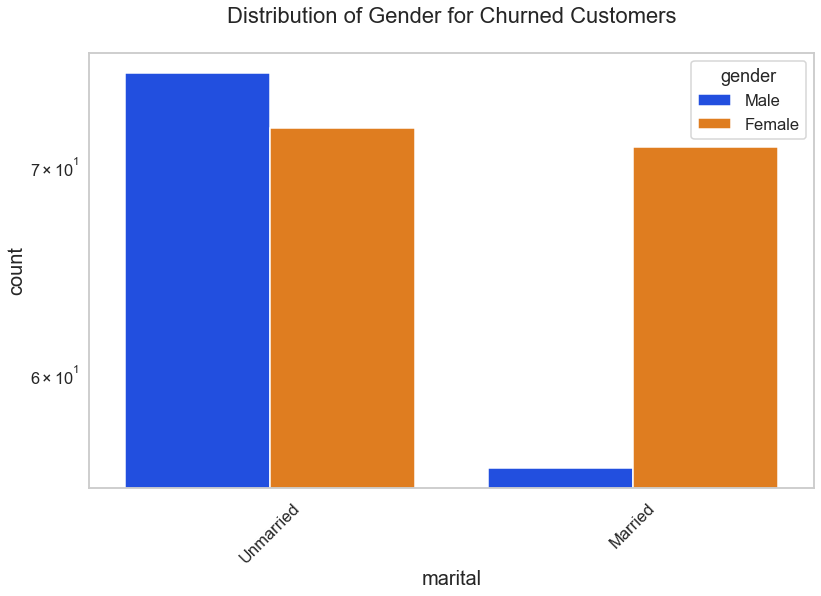

In [31]:
uniplot(new_df1_target1,col='marital',title='Distribution of Gender for Churned Customers',hue='gender')


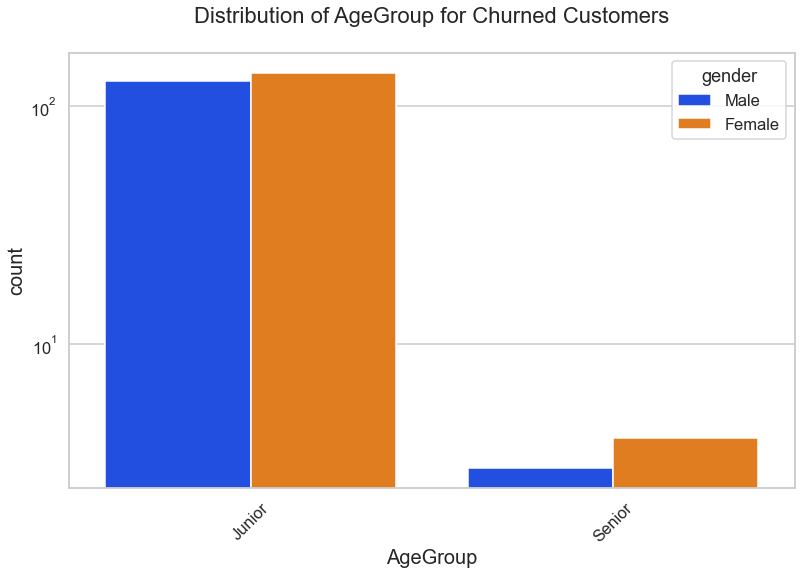

In [32]:
uniplot(new_df1_target1,col='AgeGroup',title='Distribution of AgeGroup for Churned Customers',hue='gender')


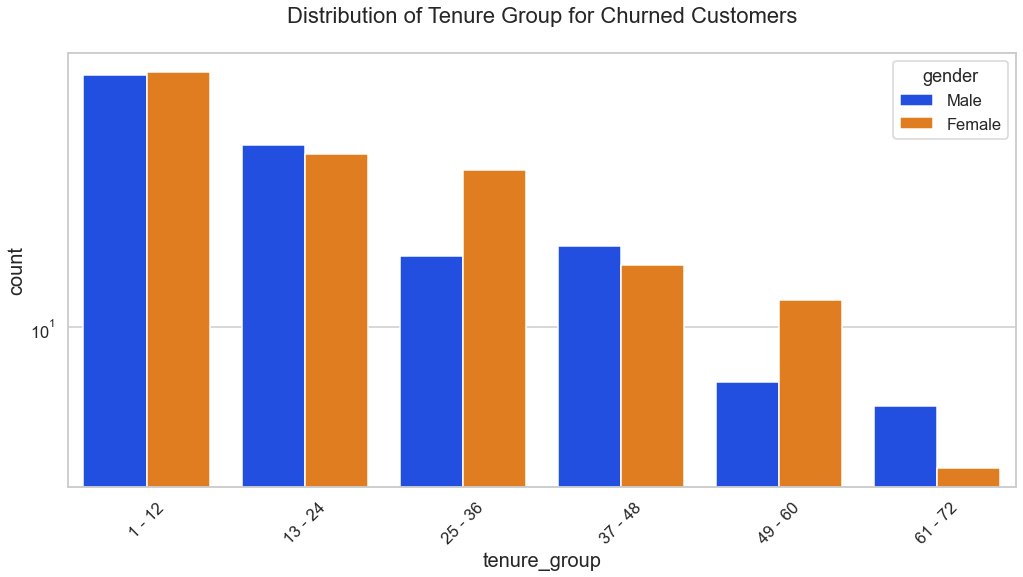

In [33]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of Tenure Group for Churned Customers',hue='gender')


### CONCLUSION
- These are some of the quick insights from this exercise:
- More unmarried males are churning where as females churning is relatively the same whether married or unmarried
- Males and females in junior age group are churning far more than those in senior age group 
- Females and males in less than a year tenure churn more with more men in longest tenure 

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [34]:
data_dummies.to_csv('tel_churn.csv')
